# **Initial Exploratory Data Analysis (EDA)**

## **Project Setup**

In [1]:
# Libraries import 
%load_ext autoreload
%autoreload 2

import sys, os
from pathlib import Path

sys.path.append(os.path.abspath(os.path.join('..')))
from watermark.dataset import DataHandler
from watermark.dataset import MissingValueAnalyzer
from watermark.features import DataFrameAnalyzer
from watermark.features import DataStatistics
from watermark.plots import PlotHandler
from watermark.plots import BoxPlotGenerator


2025-01-26 20:09:37.137 | INFO     | watermark.config:<module>:11 - PROJ_ROOT path is: D:\01_PosGrado_TEC\05_Ene_Mar_2025\00_Proyecto_Integrador\01_Reto\watermarking


In [2]:
dh = DataHandler()

In [3]:
print("Directorio de trabajo actual:", os.getcwd())


Directorio de trabajo actual: d:\01_PosGrado_TEC\05_Ene_Mar_2025\00_Proyecto_Integrador\01_Reto\watermarking\notebooks


In [4]:
data_dict = dh.load_data(Path("../data/raw"), "emothaw_data.pkl")

2025-01-26 20:09:40.490 | INFO     | watermark.dataset:load_data:50 - Loading data from ..\data\raw\emothaw_data.pkl
2025-01-26 20:09:40.673 | SUCCESS  | watermark.dataset:load_data:55 - Data loaded successfully from ..\data\raw\emothaw_data.pkl


In [39]:
# Recorrer las claves
for clave in data_dict:
    print(clave)

t1_data
t2_data
t3_data
t4_data
t5_data
t6_data
t7_data


In [61]:
# Recorrer los valores
print("Cantidad de Tareas: ",len(data_dict['t1_data']))

Cantidad de Tareas:  129


In [62]:
print("Largo de Datos: ", len(data_dict["t1_data"][0]))
data_dict["t1_data"][0].head(10) # Ejemplo de un dataframe con los datos del usuario 1 de la tarea 1

Largo de Datos:  1474


,Y,X,Azimuth,Altitude,Pressure
0,4730.0,6786.0,158.241758,172.434018,67.0
1,4735.0,6800.0,158.241758,175.953079,148.0
2,4735.0,6806.0,158.241758,175.953079,193.0
3,4736.0,6809.0,158.241758,175.953079,228.0
4,4736.0,6813.0,158.241758,175.953079,270.0
5,4736.0,6818.0,159.120879,175.953079,306.0
6,4736.0,6824.0,159.120879,175.953079,341.0
7,4736.0,6830.0,159.120879,175.953079,365.0
8,4736.0,6835.0,159.120879,175.953079,381.0
9,4736.0,6838.0,159.120879,175.953079,395.0


- Revisando el ejemplo anterior podemos analizar los siguientes datos de nuestra base de datos de uso: Contamos con 7 usuarios que hicieron una serie de 129 "Tareas" las cuales involucraban la escritura de palabras o patrones en promedio. Cada una de esta tareas cuenta con una cantidad de muestras de 1474 con base a la primera tarea.

## **Análisis Descriptivo**

In [47]:
data_watermark = data_dict["t1_data"][0] # Cargamos la primera tarea del primer usuario
# Cargamos los datos a nuestros objetos "Handlers"
ph_df = PlotHandler(data_watermark)
mva_df = MissingValueAnalyzer(data_watermark)

### **¿Hay valores faltantes en el conjunto de datos? ¿Se pueden identificar patrones de ausencia?**

- No se identifican valores faltantes marcados como NaN en el dataset lo que nos indica que cada registro es valido y se realizó un buen trabajo de muestreo para los datos de este usuario en particular.

In [52]:
mva_df.get_missing_columns()

Y: 0.000 %
X: 0.000 %
Azimuth: 0.000 %
Altitude: 0.000 %
Pressure: 0.000 %


### **¿Cuáles son las estadísticas resumidas del conjunto de datos?**
Contamos con 5 estadisticas que se miden en el conjunto de datos, para cada :
- Y --> Siendo la posición de la pluma en Y (Númerica)
- X --> Siendo la posición de la pluma en X (Númerica)
- Azimuth --> Ángulo de orientación de la pluma (Númerica) 
- Altitude --> Altitud a la que se sujetaba la pluma (Númerica)
- Pressure --> Presión que se realizo al sujetar la pluma. (Númerica)

A continuación utilizando una función de resumen damos los datos generales acerca de estas variables dentro del dataset.

In [11]:
mva_df.statistics_resume().T

Estadisticas


,count,mean,std,min,25%,50%,75%,max
Y,1474.0,3319.070556,1469.287910,0.000000,2305.000000,3504.500000,4668.750000,5126.000000
X,1474.0,4390.103799,2124.282037,0.000000,3134.000000,4178.000000,6062.750000,8026.000000
Azimuth,1474.0,171.206704,18.865782,138.901099,160.879121,167.032967,172.307692,225.054945
Altitude,1474.0,182.060107,16.693964,105.571848,175.953079,182.991202,193.548387,207.624633
Pressure,1474.0,386.453867,308.143528,0.000000,0.000000,539.500000,657.750000,775.000000


### **¿Hay valores atípicos en el conjunto de datos?**

- Para poder observar los valores atipicos hicimos uso de un boxplot para denotar los valores que salen de los usual siendo en Azimuth y Altitude las columna que cuentan con un mayor numero de outliers lo que nos idicaría que son valores a analizar si fue un error de captura o si son correctas que nos esten arrojando información adicional.

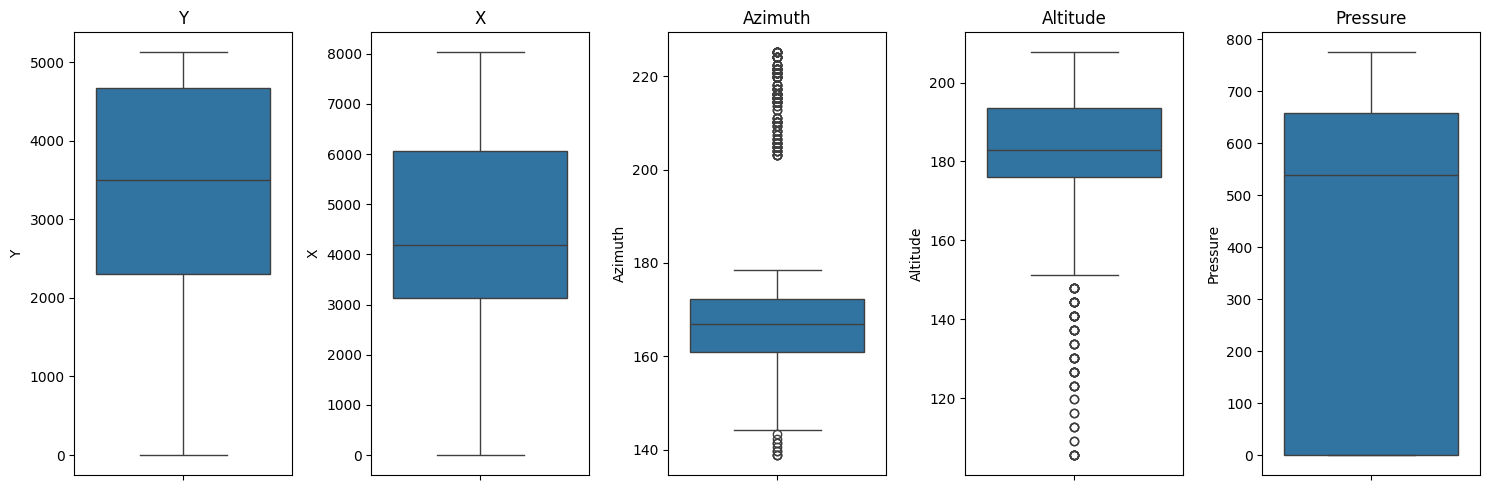

In [12]:
ph_df.plot_boxplot2()

### **¿Cuál es la cardinalidad de las variables categóricas?**

- Para este caso concreto no contamos con variables de tipo categóricas por lo que no se puede responder esta pregunta puntual.

### **¿Existen distribuciones sesgadas en el conjunto de datos? ¿Necesitamos aplicar alguna transformación no lineal?**
- Para observar la distribución de los datos y si existe algun tipo de sego aplicamos un analísis utilizando histogramas y visualizaciones de tipo Q-Q para observar la distribución de los datos.

- Observando los resultados podemos observar que todos nuestros datos tienen pequeños sesgos aunque el dato que puede ser más preocupante a simple vista al contar con una gran cantidad de datos en ese origen es acerca de "Pressure" ya que este cuenta con una gran cantidad de valores de ceros.


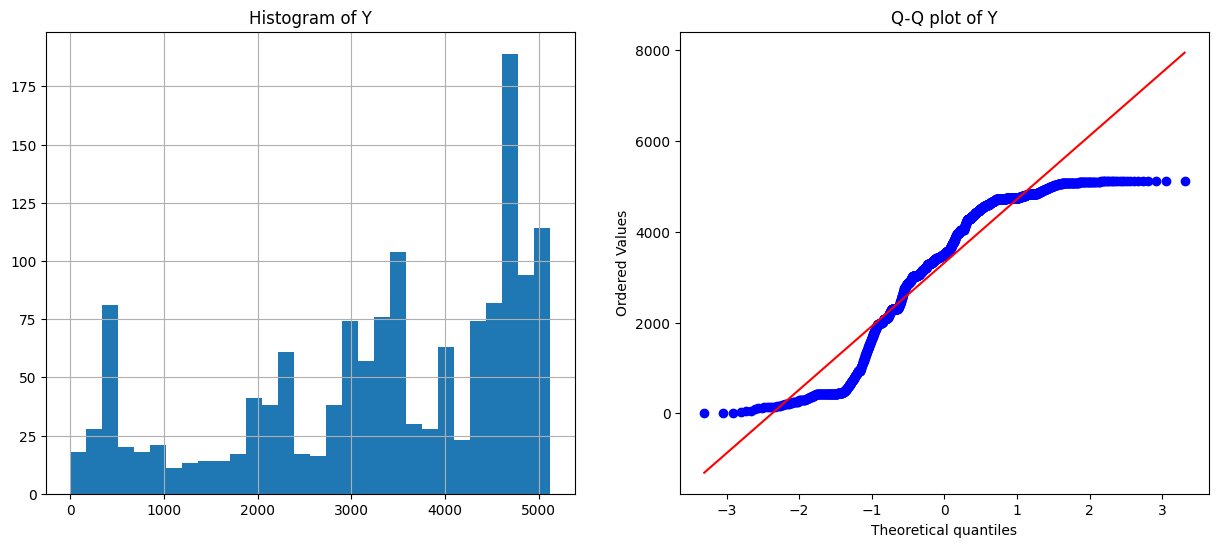

In [13]:
ph_df.diagnostic_plots("Y")

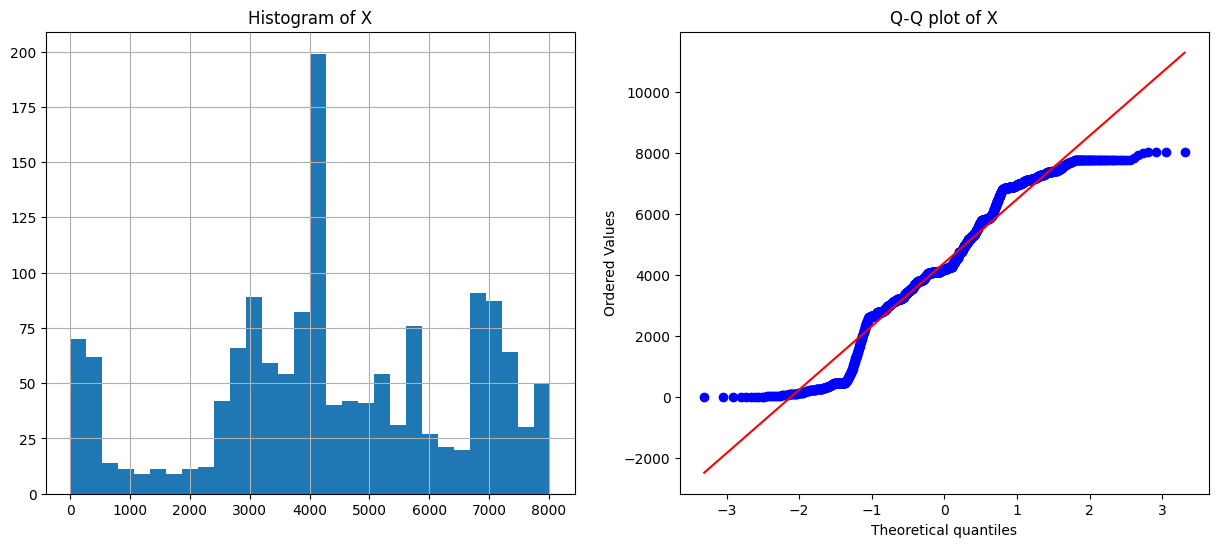

In [14]:
ph_df.diagnostic_plots("X")

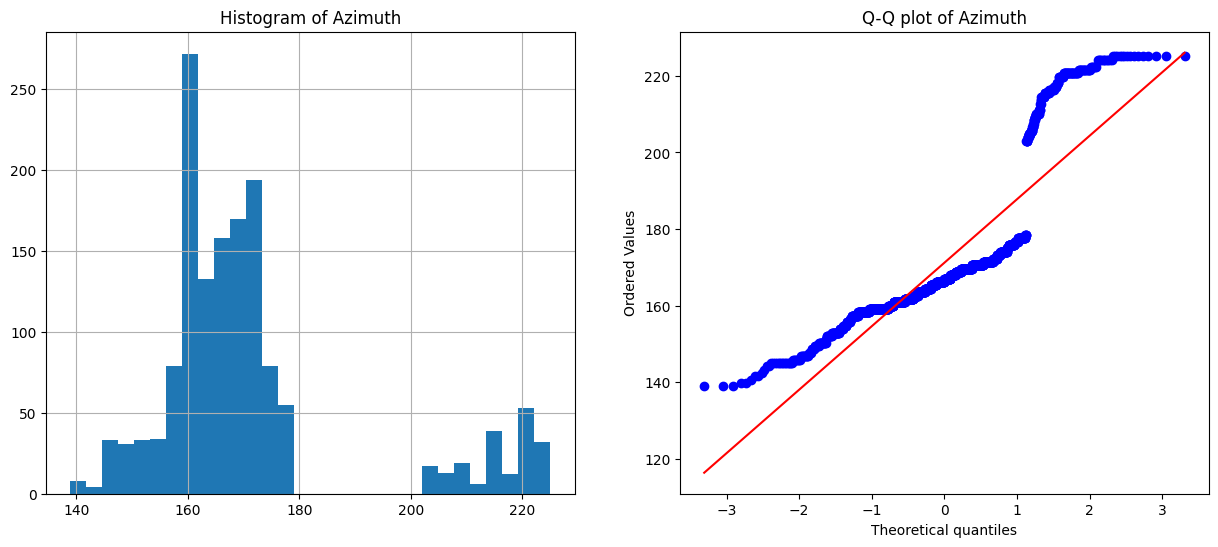

In [15]:
ph_df.diagnostic_plots("Azimuth")

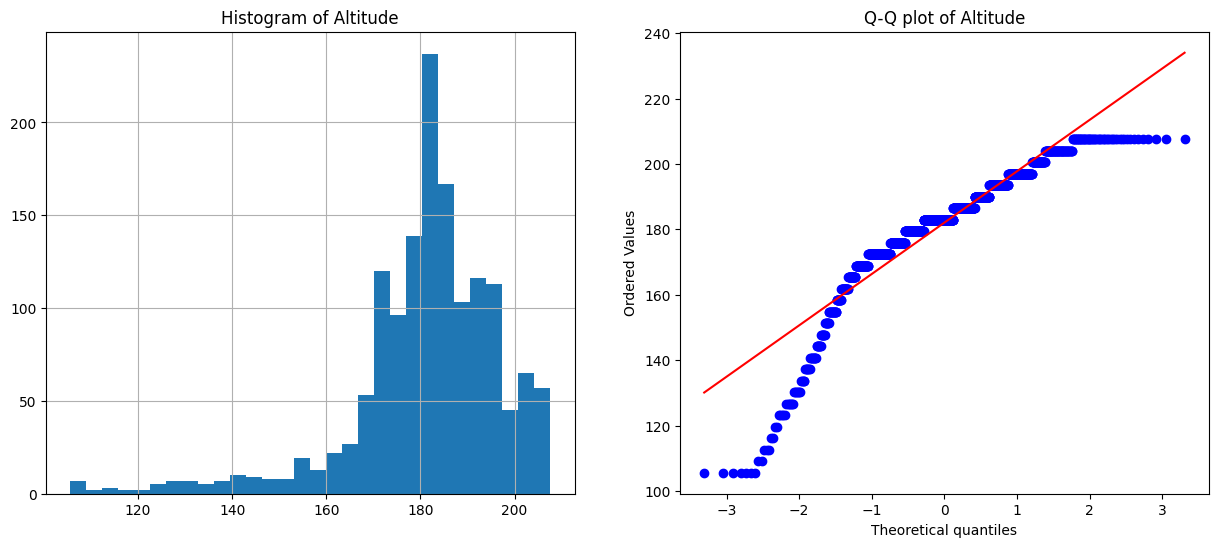

In [16]:
ph_df.diagnostic_plots("Altitude")

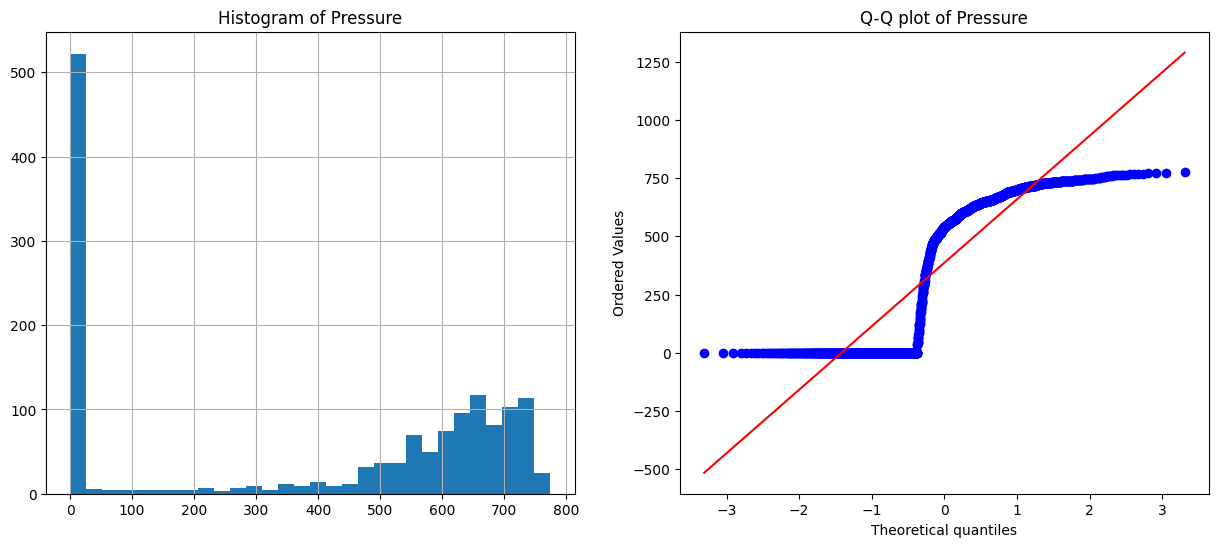

In [17]:
ph_df.diagnostic_plots("Pressure")

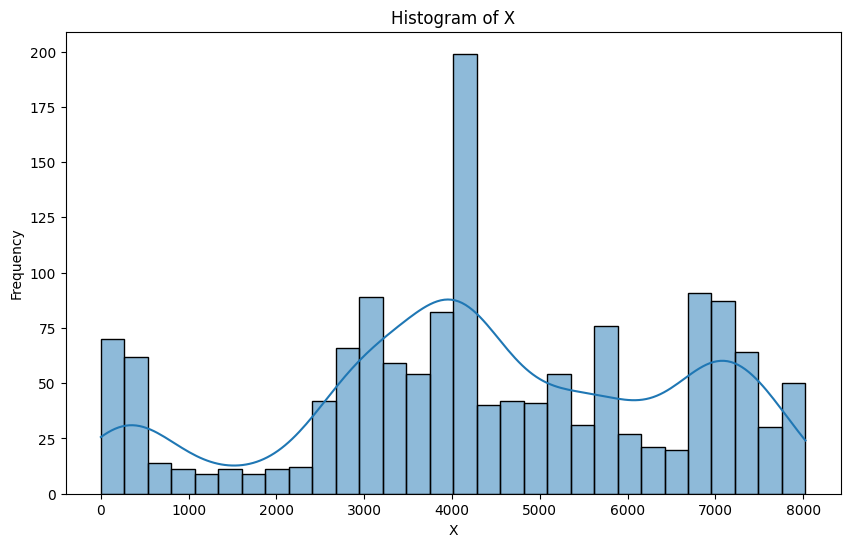

In [18]:
ph_df.plot_hist(column='X', save=False)

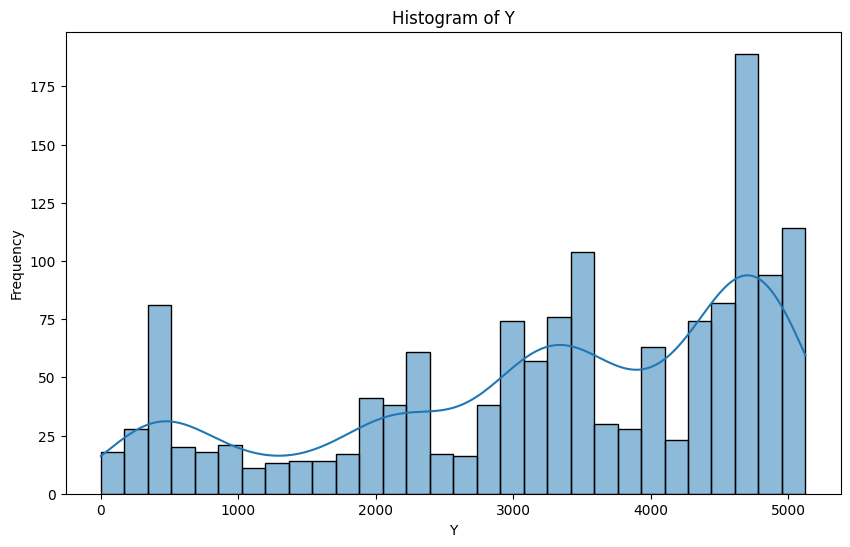

In [19]:
ph_df.plot_hist(column='Y', save=False)

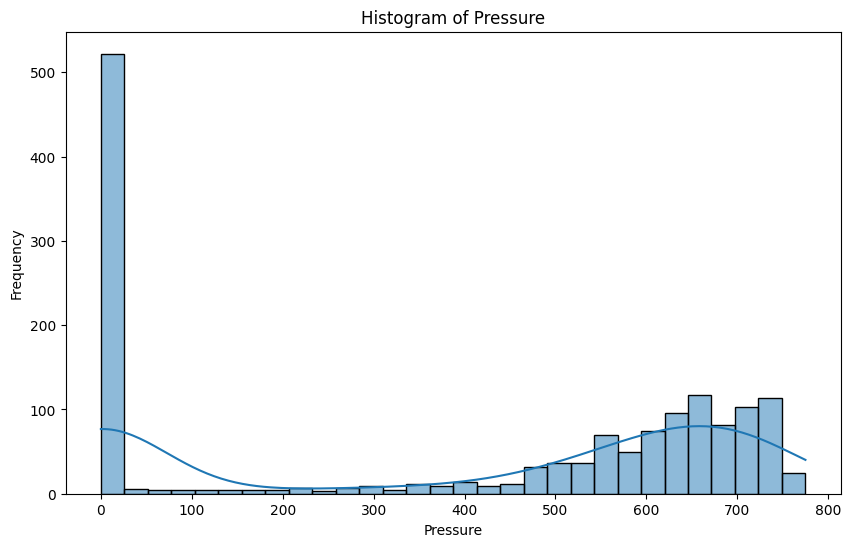

In [20]:
ph_df.plot_hist(column='Pressure', save=False)

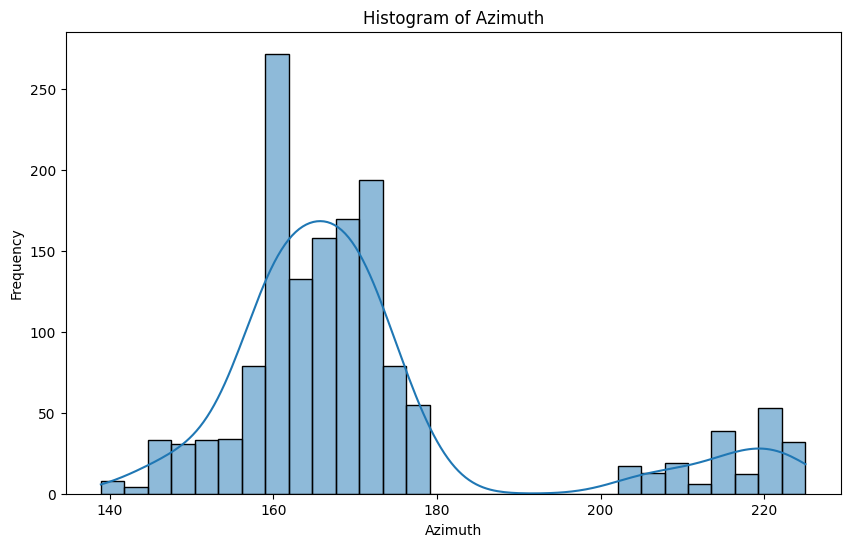

In [21]:
ph_df.plot_hist(column='Azimuth', save=False)

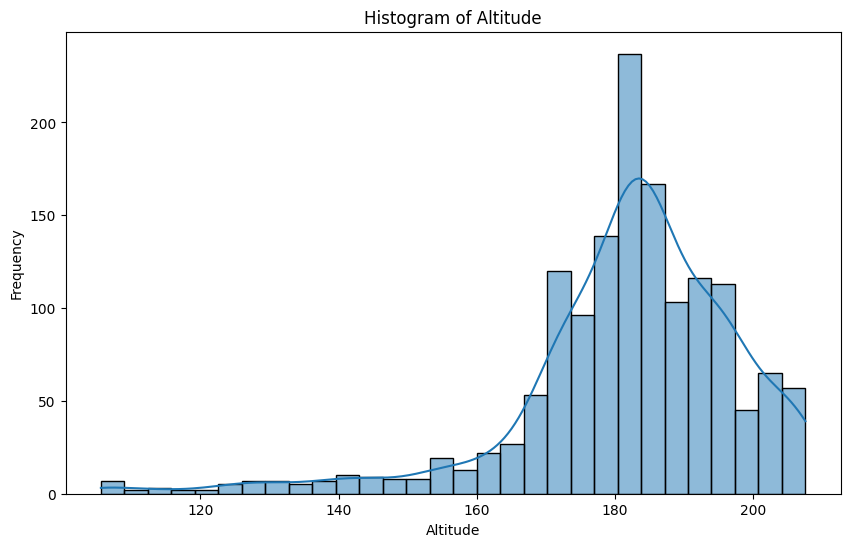

In [22]:
ph_df.plot_hist(column='Altitude', save=False)